In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("KNNAlgorithmDataset.csv")

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


array([[<AxesSubplot:xlabel='id', ylabel='id'>,
        <AxesSubplot:xlabel='compactness_worst', ylabel='id'>,
        <AxesSubplot:xlabel='concavity_worst', ylabel='id'>,
        <AxesSubplot:xlabel='concave points_worst', ylabel='id'>,
        <AxesSubplot:xlabel='symmetry_worst', ylabel='id'>,
        <AxesSubplot:xlabel='fractal_dimension_worst', ylabel='id'>],
       [<AxesSubplot:xlabel='id', ylabel='compactness_worst'>,
        <AxesSubplot:xlabel='compactness_worst', ylabel='compactness_worst'>,
        <AxesSubplot:xlabel='concavity_worst', ylabel='compactness_worst'>,
        <AxesSubplot:xlabel='concave points_worst', ylabel='compactness_worst'>,
        <AxesSubplot:xlabel='symmetry_worst', ylabel='compactness_worst'>,
        <AxesSubplot:xlabel='fractal_dimension_worst', ylabel='compactness_worst'>],
       [<AxesSubplot:xlabel='id', ylabel='concavity_worst'>,
        <AxesSubplot:xlabel='compactness_worst', ylabel='concavity_worst'>,
        <AxesSubplot:xlabel='concavit

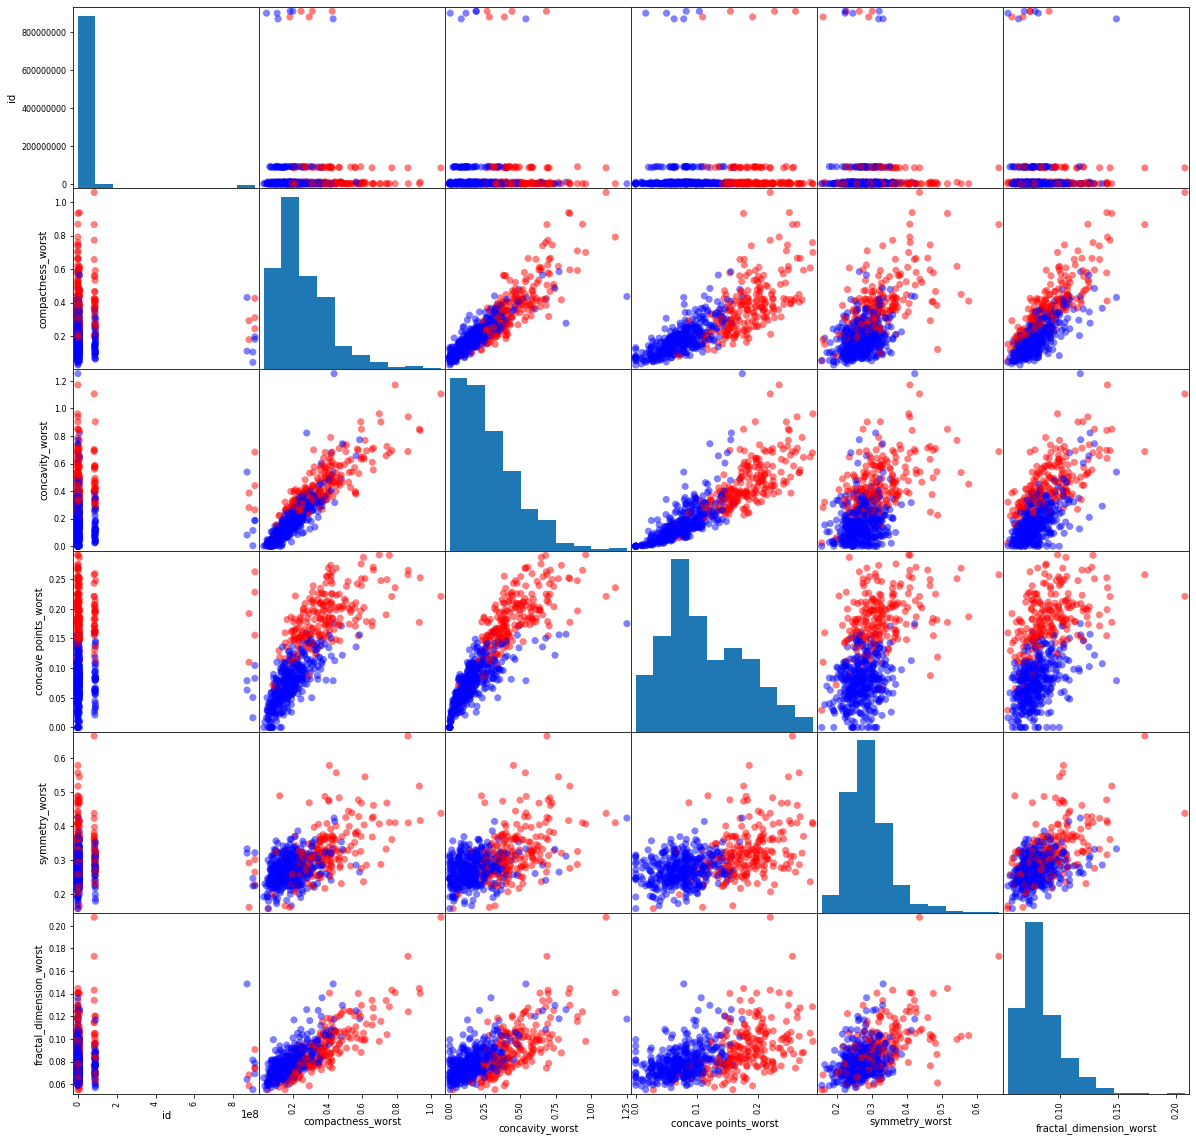

In [36]:
plottingDf = df.drop(columns=["Unnamed: 32"], inplace=False)
colors = ["red" if cur == "M" else "blue" for cur in df.diagnosis]
for i in range(1, 27):
    plottingDf.drop(columns=[df.columns[i]], inplace=True)

pd.plotting.scatter_matrix(plottingDf, figsize=(20, 20), color=colors, s=200)

In [37]:
df.diagnosis = [1 if cur == "M" else 0 if cur == "B" else -1 for cur in df.diagnosis]
y = df.diagnosis

x = df.drop(columns=["id", "diagnosis", "Unnamed: 32"], inplace=False)
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [38]:
from sklearn.preprocessing import normalize

norm_data = normalize(x.values, norm="l2", axis=0)

x = pd.DataFrame(norm_data, columns=x.columns)
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.040678,0.040919,0.040534,0.036935,0.041483,0.037410,0.031208,0.032855,0.041451,0.041660,...,0.040189,0.040772,0.040008,0.035214,0.041313,0.035658,0.033284,0.036373,0.041002,0.040986
std,0.010147,0.009124,0.010709,0.019848,0.006055,0.018936,0.028017,0.026061,0.006273,0.004684,...,0.011939,0.009760,0.012534,0.022768,0.007126,0.022065,0.025511,0.020862,0.008745,0.008818
min,0.020101,0.020598,0.019300,0.008093,0.022657,0.006949,0.000000,0.000000,0.024254,0.033144,...,0.019589,0.019086,0.018803,0.007406,0.022213,0.003827,0.000000,0.000000,0.022121,0.026873
25%,0.033689,0.034301,0.033130,0.023705,0.037183,0.023276,0.010389,0.013641,0.037044,0.038278,...,0.032138,0.033473,0.031373,0.020606,0.036392,0.020643,0.014001,0.020607,0.035394,0.034890
50%,0.038497,0.039965,0.038009,0.031082,0.041272,0.033212,0.021628,0.022500,0.041002,0.040826,...,0.036980,0.040348,0.036427,0.027452,0.040980,0.029717,0.027721,0.031715,0.039888,0.039079
75%,0.045437,0.046244,0.045880,0.044144,0.045332,0.046754,0.045933,0.049700,0.044778,0.043864,...,0.046416,0.047192,0.046774,0.043348,0.045568,0.047555,0.046822,0.051225,0.044935,0.044957
max,0.080939,0.083325,0.083078,0.141055,0.070344,0.123840,0.149994,0.135132,0.069557,0.064642,...,0.089028,0.078664,0.093697,0.170113,0.069475,0.148372,0.153097,0.092356,0.093827,0.101310


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.30, shuffle=True)

In [62]:
from sklearn.neighbors import KNeighborsClassifier

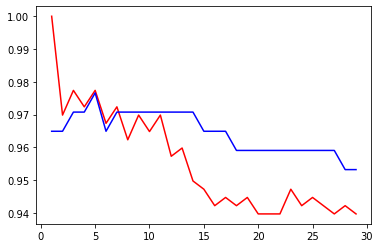

0.9645089735833835


In [71]:
train_score_list = []
test_score_list = []
n_neighbors = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i, metric="minkowski", p=2)
    n_neighbors.append(i)
    knn.fit(X_train, y_train)
    test_score_list.append(knn.score(X_test, y_test))
    train_score_list.append(knn.score(X_train, y_train))

plt.plot(n_neighbors, train_score_list, c='r')
plt.plot(n_neighbors, test_score_list, c='b')
plt.show()
print(np.mean(test_score_list))

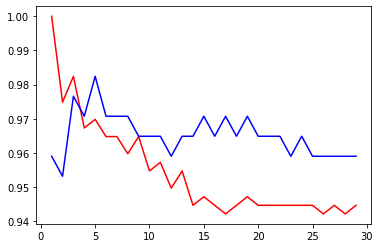

0.9653155878201247


In [72]:
train_score_list = []
test_score_list = []
n_neighbors = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i, metric="minkowski", p=1)
    n_neighbors.append(i)
    knn.fit(X_train, y_train)
    test_score_list.append(knn.score(X_test, y_test))
    train_score_list.append(knn.score(X_train, y_train))

plt.plot(n_neighbors, train_score_list, c='r')
plt.plot(n_neighbors, test_score_list, c='b')
plt.show()
print(np.mean(test_score_list))

In [73]:
knn = KNeighborsClassifier(n_neighbors=10, metric="minkowski", p=2)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9707602339181286